In [6]:
# My little btc quote bot

In [63]:
import requests
import json
import numpy as np
import pandas as pd
import time
import datetime
import pytz

%matplotlib inline
import matplotlib.pyplot as plt



In [11]:
#baseurl = 'https://blocmarket.herokuapp.com/'
# baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [30]:
# set up quote api
headers = {}
apikey = 'VVOJSV9CUU9JRCSE'
quoteurl = 'https://www.alphavantage.co/query?function=CURRENCY_EXCHANGE_RATE&from_currency=BTC&to_currency=USD&apikey=' + apikey
# Test realtime quote 
response = requests.get(quoteurl, headers=headers)
# Look at the quote
response.json()

{'Realtime Currency Exchange Rate': {'1. From_Currency Code': 'BTC',
  '2. From_Currency Name': 'Bitcoin',
  '3. To_Currency Code': 'USD',
  '4. To_Currency Name': 'United States Dollar',
  '5. Exchange Rate': '4036.58000000',
  '6. Last Refreshed': '2019-03-16 07:53:20',
  '7. Time Zone': 'UTC'}}

In [31]:
quote = float(response.json()['Realtime Currency Exchange Rate']['5. Exchange Rate'])
quote

4036.58

In [81]:
headers

{}

In [80]:
z = response.json()['Realtime Currency Exchange Rate']['6. Last Refreshed']
t = datetime.datetime.strptime(z, '%Y-%m-%d %H:%M:%S')
tUTC = pytz.utc.localize(t)
tUTC


datetime.datetime(2019, 3, 16, 7, 53, 20, tzinfo=<UTC>)

In [14]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [15]:
# View response as json
response.json()

{'signingKey': '215cc741f495c8589915187023b64c4393df3e4c594a78ca255c54190c32afb2',
 'traderId': '3',
 'verifyKey': '04a8d988b570de5f43bf1f71c3b44730f5c2f08ef7227b1c65410ce8b394b40b'}

In [16]:
# Copy keys and traderid from response
sk = response.json()['signingKey']
vk = response.json()['verifyKey']
tId = int(response.json()['traderId'])


In [17]:
# Create a new market
mkRtId = 3
mkBrId = 1


url = baseurl + 'createMarket'
content_makemarket = {"signingKey": sk,
                        "traderId": tId, 
                        "verifyKey": vk,
                        "marketRootId": mkRtId, 
                        "marketBranchId": mkBrId, 
                        "marketMin": 2500,
                        "marketMax":4500,
                        "marketDesc": 'BTCUSD'}
# Post market
response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)


In [22]:
# response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 4,
 'price': 4012.79,
 'quantity': 1,
 'traderId': 3}

In [23]:
# Save market id from response
mkId = response.json()['marketId']
quote

4012.79

In [24]:
# Create a trade
tradeurl = baseurl+'createTrade'

content_maketrade = {"signingKey": sk,
                     "traderId": tId,
                     "verifyKey": vk,
                     "marketId": int(mkId),
                     "price":quote,
                     "quantity": 1}
response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)

In [26]:
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 4,
 'price': 4012.79,
 'quantity': 1,
 'traderId': 3}

In [29]:
content_maketrade

{'signingKey': '215cc741f495c8589915187023b64c4393df3e4c594a78ca255c54190c32afb2',
 'traderId': 3,
 'verifyKey': '04a8d988b570de5f43bf1f71c3b44730f5c2f08ef7227b1c65410ce8b394b40b',
 'marketId': 4,
 'price': 4012.79,
 'quantity': 1}

In [ ]:


stillQuoting = True
i=0
prevQuote = quote

while stillQuoting==True:
    # Quote from source
    i+=1
    response = requests.get(quoteurl, headers=headers)
    quote = float(response.json()['Realtime Currency Exchange Rate']['5. Exchange Rate'])
    if (prevQuote == quote):
        time.sleep(3*60)
    else:     
        # Make a bid
        content_maketrade['price'] = quote-1
        content_maketrade['quantity'] =1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        # Make an offer
        content_maketrade['price'] = quote+1
        content_maketrade['quantity'] = -1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        time.sleep(3*60)

        # Remove bid 
        content_maketrade['price'] = quote-1
        content_maketrade['quantity'] =-1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        # Remove offer
        content_maketrade['price'] = quote+1
        content_maketrade['quantity'] = 1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        print('Price for iteration ' + str(i) + ' : ' + str(content_maketrade['price']))
        prevQute = quote

Price for iteration 1 : 4155.49
Price for iteration 2 : 4159.71
Price for iteration 3 : 4159.55
Price for iteration 4 : 4160.51
Price for iteration 5 : 4160.72
Price for iteration 6 : 4160.29
Price for iteration 7 : 4158.74
Price for iteration 8 : 4160.43
Price for iteration 9 : 4161.4
Price for iteration 10 : 4158.53
Price for iteration 11 : 4157.68
Price for iteration 12 : 4148.82
Price for iteration 13 : 4147.44
Price for iteration 14 : 4152.2
Price for iteration 15 : 4150.04
Price for iteration 16 : 4141.11
Price for iteration 17 : 4145.62
Price for iteration 18 : 4148.32
Price for iteration 19 : 4152.98
Price for iteration 20 : 4157.06
Price for iteration 21 : 4154.61
Price for iteration 22 : 4155.67
Price for iteration 23 : 4155.07
Price for iteration 24 : 4152.83
Price for iteration 25 : 4156.07
Price for iteration 26 : 4158.32
Price for iteration 27 : 4157.07
Price for iteration 28 : 4156.85
Price for iteration 29 : 4157.96
Price for iteration 30 : 4157.44
Price for iteration 3

In [43]:
content_maketrade

{'signingKey': 'f77e8e20b146f2a75abdb360f74bb5f6061a87a7b8069ea2368802f454668918',
 'traderId': 7,
 'verifyKey': '90ff93d666f1d5935f8ff338b3e928fdff75f13e4189b462de6fd3c69ee47cf1',
 'marketId': 7,
 'price': 3615.07,
 'quantity': -1}

In [44]:
content_maketrade['quantity'] = quote

In [58]:
response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)

In [59]:
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': False, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': False}",
 'checks': 'False',
 'marketId': 7,
 'price': 3615.36,
 'quantity': 1,
 'traderId': 8}

'http://127.0.0.1:7000/createTrade'

In [133]:
# View summary of trader for a particular trader
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [134]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketRootId,marketBranchId,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,5,3969.84,1,9,False,2019-02-23 04:55:59.621,3,1,0,0.7,-3969.84,-3969.14
1,5,3965.90,1,9,True,2019-02-23 04:56:13.092,3,1,0,0.7,-3965.90,-3965.20
10,5,3964.10,-1,9,True,2019-02-23 05:02:17.648,3,1,0,0.7,3964.10,3963.40
100,5,3965.04,1,9,True,2019-02-23 06:12:38.068,3,1,0,0.7,-3965.04,-3964.34
1000,5,4046.62,1,9,True,2019-02-23 17:37:25.872,3,1,0,0.7,-4046.62,-4045.92
1001,5,4073.13,1,9,True,2019-02-23 17:37:27.579,3,1,0,0.7,-4073.13,-4072.43
1002,5,4075.13,-1,9,True,2019-02-23 17:37:27.690,3,1,0,0.7,4075.13,4074.43
1003,5,4073.13,-1,9,True,2019-02-23 17:40:27.812,3,1,0,0.7,4073.13,4072.43
1004,5,4075.13,1,9,True,2019-02-23 17:40:27.922,3,1,0,0.7,-4075.13,-4074.43
1005,5,4078.88,1,9,True,2019-02-23 17:40:29.884,3,1,0,0.7,-4078.88,-4078.18


In [140]:
thing = {"marketId":{"0":1,"1":2,"2":3,"3":4,"4":5,"5":6,"6":7,"7":8,"8":9,"9":10,"10":11,"11":12,"12":13,"13":14,"14":15,"15":16,"16":17,"17":18,"18":19,"19":20,"20":21,"21":22,"22":23,"23":24,"24":25,"25":26,"26":27,"27":28,"28":29,"29":30,"30":31,"31":32,"32":33,"33":34},"marketRootId":{"0":1,"1":2,"2":3,"3":4,"4":5,"5":6,"6":1,"7":1,"8":1,"9":1,"10":1,"11":1,"12":1,"13":1,"14":1,"15":3,"16":3,"17":3,"18":3,"19":3,"20":3,"21":3,"22":3,"23":3,"24":4,"25":6,"26":6,"27":6,"28":6,"29":6,"30":6,"31":6,"32":6,"33":6},"marketBranchId":{"0":1,"1":1,"2":1,"3":1,"4":1,"5":1,"6":2,"7":3,"8":4,"9":5,"10":6,"11":7,"12":8,"13":9,"14":10,"15":2,"16":3,"17":4,"18":5,"19":6,"20":7,"21":8,"22":9,"23":10,"24":2,"25":2,"26":3,"27":4,"28":5,"29":6,"30":7,"31":8,"32":9,"33":10},"marketMin":{"0":0.11,"1":0.0,"2":0.0,"3":0.0,"4":0.0,"5":0.0,"6":0.11,"7":0.11,"8":0.11,"9":0.11,"10":0.11,"11":0.11,"12":0.11,"13":0.11,"14":0.11,"15":0.0,"16":0.0,"17":0.0,"18":0.0,"19":0.0,"20":0.0,"21":0.0,"22":0.0,"23":0.0,"24":0.0,"25":0.0,"26":0.0,"27":0.0,"28":0.0,"29":0.0,"30":0.0,"31":0.0,"32":0.0,"33":0.0},"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7,"4":0.7,"5":0.7,"6":0.7,"7":0.7,"8":0.7,"9":0.7,"10":0.7,"11":0.7,"12":0.7,"13":0.7,"14":0.7,"15":0.7,"16":0.7,"17":0.7,"18":0.7,"19":0.7,"20":0.7,"21":0.7,"22":0.7,"23":0.7,"24":0.7,"25":0.7,"26":0.7,"27":0.7,"28":0.7,"29":0.7,"30":0.7,"31":0.7,"32":0.7,"33":0.7}}


dict

In [18]:
# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])


Text(0.5, 1.0, 'Time series for market 5 / trader 5')

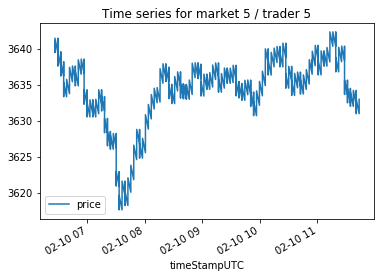

In [19]:
plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))

In [20]:
bids = a[a['quantity']<0]
asks = a[a['quantity']>0]

Text(0.5, 1.0, 'Time series for market 5 / trader 5')

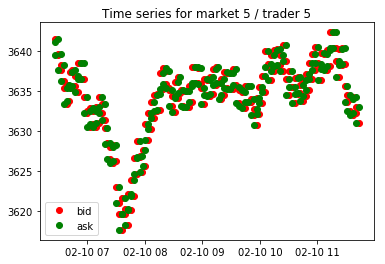

In [21]:
plt.figure(); 
plt.plot(bids['timeStampUTC'],bids['price'], 'ro');
plt.plot(asks['timeStampUTC'],asks['price'], 'go');
plt.legend(('bid', 'ask')); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))
